<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/cv_with_dl/6_Advanced_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Advanced CNN

**학습 목표**

* GoogLeNet의 구조와 장점을 살펴보며, Inception Module의 특징을 설명할 수 있습니다.
* 1 x 1 convolution의 효과를 설명할 수 있습니다.
* ResNet의 구조를 살펴보며, Skip connection을 통해서 얻을 수 있는 효과를 설명할 수 있습니다.

**Q. GoogLeNet은 독특한 모델 구조를 가지고 있습니다. 이러한 GoogLeNet의 아이디어는 어떤 것이었는지 설명해 보세요.**
```
적절한 커널의 필터 사이즈와 Pooling(down sampling)을 고민해서 찾아내기보다는 여러 사이즈의 필터들을 한꺼번에 결합하는 방식을 제공하였고, 논문(Going deeper with convolutions)에서는 이를 Inception module로 지칭하였습니다.
```

**Q. GoogLeNet은 Inception module끼리 어떻게 연결되는지, 여러 개의 Inception module을 연결했을 때의 장점에 대해서 설명해 보세요.**
```
GoogLeNet은 Inception module들을 Pooling을 통해 연속적으로 이어서 구성되었습니다. 여러 사이즈의 필터들이 서로 다른 공간 기반으로 Feature들을 추출하고, 이를 결합하면서 보다 풍부한 Feature Extractor layer의 구성이 가능합니다.
```

**Q. 1x1 Filter을 사용했을 때의 장점에 대해서 설명해 보세요.**
```
Depth가 깊은 Input tensor에 동일한 channel 수를 가진 1x1 filter를 conv2D 연산을 하면 feature map의 channel이 1이 됩니다. 즉 10개의 channel을 1개의 channel로 압축시킵니다. 1x1 filter를 사용하면 channel 수를 줄이기 때문에 연산량도 감소하고, 활성화 함수를 2번 사용하여 비선형성을 강화시킨다는 장점이 있습니다.
```

**Q. GoogLeNet에서는 Inception Module 이후, Global Average Pooling을 사용했습니다. Global Average Pooling이 무엇인지 설명해 보세요.**
```
Global Average Pooling은 전체 featuremap의 평균값을 뽑아 pooling을 한 것을 의미합니다. 또한, Global Average Pooling은 parameter가 추가로 필요하지 않습니다.
```

**Q. GoogLeNet을 만든 사람들은 vanishing gradient 문제를 해결하기 위해 Auxiliary classifier를 모델에 덧붙였습니다.  
    Auxiliary classifier을 통해서 가질 수 있는 효과에 대해서 설명해 보세요.**
```
Auxiliary classifier를 모델에 2개를 붙여 결과적으로 loss를 맨 끝뿐만 아니라 중간에서도 구하기 때문에 기울기를 역전파 시킬 수 있었습니다.
대신 결과에 지나치게 영향을 주는 것을 막기 위해 auxiliary classifier의 loss에는 0.3을 곱하였습니다. 그리고 실제로 테스트하는 과정에서는 auxiliary classifier를 제거하고, 맨 끝의 softmax만을 사용하였습니다.
```

**Q. ResNet은 Vanishing gradient의 문제를 해결하기 위해 어떤 것을 사용했는지 설명해 보세요.**
```
레이어가 깊어지면서 생기는 Vanishing gradient 문제를 해결하기 위해 ResNet은 skip connection을 사용하였습니다. skip connection을 통해 학습하는 것을 residual learning이라고 합니다.
```

**Q. Residual Learning: Skip Connection을 통해서 얻을 수 있는 것은 무엇인지 설명해 보세요.**
```
Residual Learning은 일정 시점마다 input x 자체를 skip connection을 통해 연결합니다. 이로 인해 backpropagation을 할 때 Identitiy mapping을 통해 loss 값이 변함 없이 전달되기 때문에 Gradient flow가 원활하게 이루어집니다. 따라서 모델을 깊게 쌓는 것에 대한 부담이 줄어듭니다. 그래서 Vanishing gradient의 문제를 해결할 수 있어 Skip Connection을 gradient “highway”라고 부르기도 합니다.
```

**Q. 심화된 CNN 구조의 핵심은 어떤 것이며 이를 통해 발생할 수 있는 문제는 어떤 것이 있었는지 설명해 보세요.**
```
심화된 CNN 모델의 핵심은 모델의 깊이를 늘이는 데에 있습니다. 깊이를 늘리는 데 가장 큰 문제는 Vanishing gradient입니다. 따라서 Vanishing gradient를 해결할 수 있는 구조를 만드는 것이 CNN 모델 발전의 핵심입니다.
```

### Naïve Inception module from scratch

In [ ]:
# Lib

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model

In [ ]:
# Naïve Inception 블록을 만들기 위한 함수

def naive_inception(input_layer, conv1_filter, conv3_filter, conv5_filter):
    # 1x1 사이즈의 kernel을 이용한 convolution2d layer
    conv1 = keras.layers.Conv2D(conv1_filter, (1,1), padding='same', activation='relu')(input_layer)

    # Q. 3x3 사이즈의 kernel을 이용한 convolution2d layer를 만들어 보세요.
    conv3 = keras.layers.Conv2D(conv3_filter, (3,3), padding='same', activation='relu')(input_layer)

    # Q. 5x5 사이즈의 kernel을 이용한 convolution2d layer를 만들어 보세요.
    conv5 = keras.layers.Conv2D(conv5_filter, (5,5), padding='same', activation='relu')(input_layer)


    # 3x3 max pooling layer (데이터의 가로 세로를 3x3로 살펴보고 가장 큰 값만 뽑아낸다)
    pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)

    # 위에서 언급한 4개의 layer 통해서 나온 feature map들을 모두 concatenation 한다.
    out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
    return out_layer

In [ ]:
input_data = keras.layers.Input(shape=(256, 256, 3))
naive_inception_out = naive_inception(input_data, 64, 128, 32)

In [ ]:
print(naive_inception_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 227), dtype=tf.float32, name=None), name='concatenate/concat:0', description="created by layer 'concatenate'")


In [ ]:
model = keras.models.Model(inputs=input_data, outputs=naive_inception_out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 256         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 128 3584        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 2432        input_1[0][0]                    
______________________________________________________________________________________________

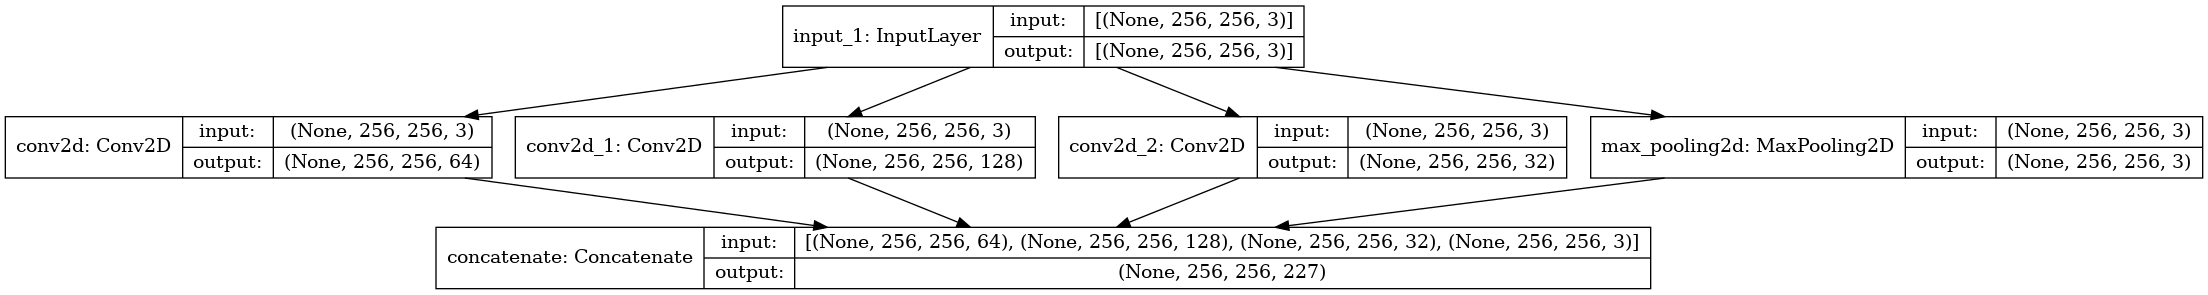

In [ ]:
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

### Inception module with 1x1 convolution

In [ ]:
# Lib

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model

In [ ]:
# Inception 블록을 만들기 위한 함수

def inception(input_layer, conv1_filter, conv3_in, conv3_out, conv5_in, conv5_out, pooling_out):
    # 1x1 사이즈의 kernel을 이용한 convolution2d layer
    conv1 = keras.layers.Conv2D(conv1_filter, (1,1), padding='same', activation='relu')(input_layer)

    # 3x3 사이즈의 kernel을 이용한 convolution2d layer
    conv3 = keras.layers.Conv2D(conv3_in, (1,1), padding='same', activation='relu')(input_layer) # Naive 버전과 가장 차별화되는 부분: 1x1 convolution
    conv3 = keras.layers.Conv2D(conv3_out, (3,3), padding='same', activation='relu')(conv3)

    # Q. 5x5 사이즈의 kernel을 이용한 convolution2d layer 를 만들어 보세요.
    conv5 = keras.layers.Conv2D(conv3_in, (1,1), padding='same', activation='relu')(input_layer) # Naive 버전과 가장 차별화되는 부분: 1x1 convolution
    conv5 = keras.layers.Conv2D(conv3_out, (5,5), padding='same', activation='relu')(conv5)

    # 3x3 max pooling layer (데이터의 가로 세로를 3x3로 살펴보고 가장 큰 값만 뽑아낸다)
    pool = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(input_layer)
    pool = keras.layers.Conv2D(pooling_out, (1,1), padding='same', activation='relu')(pool)

    # 위에서 언급한 4개의 layer 통해서 나온 feature map들을 모두 concatenation 한다.
    out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
    return out_layer

In [ ]:
input_data = keras.layers.Input(shape=(256, 256, 3))
inception_out = inception(input_data, 64, 96, 128, 16, 32, 32)

In [ ]:
print(inception)

<function inception at 0x7f566b2a7b80>


In [ ]:
model = keras.models.Model(inputs=input_data, outputs=inception_out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 256, 256, 96) 384         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 256, 256, 96) 384         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 256, 256, 3)  0           input_2[0][0]                    
____________________________________________________________________________________________

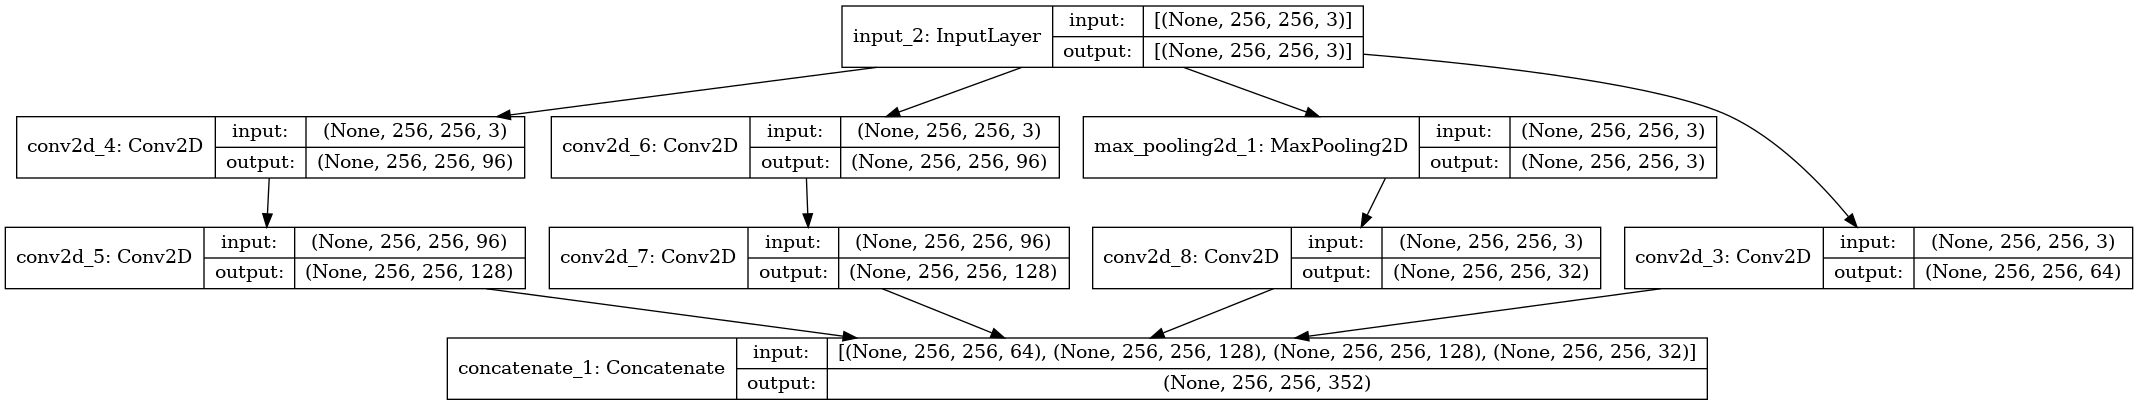

In [ ]:
plot_model(model, show_shapes=True, to_file='inception.png')

### Skip Connection

In [ ]:
# Lib

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model

In [ ]:
def residual_module(input_layer, n_filters):
    merge_input = input_layer

    # if문에서는 채널 사이즈가 동일한지 확인하고, 만일 동일하지 않다면 1x1 convolution을 통해서 채널 사이즈를 맞춰 준다.
    if input_layer.shape[-1] != n_filters:
        merge_input = keras.layers.Conv2D(n_filters, (1,1), padding='same', activation='relu')(input_layer) # n_filter로 채널 사이즈를 맞춰 준다.
    # Conv2D layer
    conv1 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='relu')(input_layer)
    # Conv2D layer
    conv2 = keras.layers.Conv2D(n_filters, (3,3), padding='same', activation='linear')(conv1)

    # Add를 통해서 skip connection을 구현하는 부분
    out_layer = keras.layers.Add()([conv2, merge_input])
    out_layer = keras.layers.Activation('relu')(out_layer)

    return out_layer

In [ ]:
input = keras.layers.Input(shape=(256, 256, 3))
residual_out = residual_module(input, 64)

In [ ]:
print(residual_out)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 64), dtype=tf.float32, name=None), name='activation/Relu:0', description="created by layer 'activation'")


In [ ]:
model = keras.models.Model(inputs=input, outputs=residual_out)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 256, 256, 64) 1792        input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_10[0][0]                  
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 256, 256, 64) 256         input_3[0][0]                    
____________________________________________________________________________________________

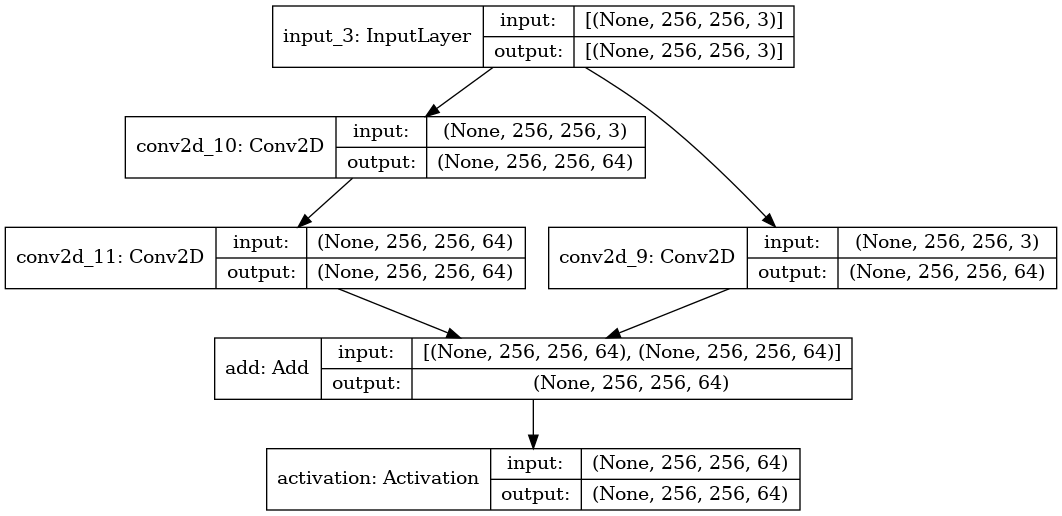

In [ ]:
plot_model(model, show_shapes=True, to_file='residual_module.png')